In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

import string

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\towab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\towab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\towab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\towab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
columns = ["WikiID", "FreebaseID", "Name", "ReleaseDate", "BoxOfficeRevenue", "Runtime", "Languages", "Countries", "Genres"]
df_meta = pd.read_csv("movie.metadata.tsv", sep="\t", names=columns)
df_meta.loc[df_meta["WikiID"]==29666067, "ReleaseDate"] = "2010-12-02"
df_meta["ReleaseDate"] = pd.to_datetime(df_meta["ReleaseDate"])
df_meta = df_meta[~df_meta["ReleaseDate"].isna()]

In [4]:
df_synopsis = pd.read_csv("plot_summaries.txt", sep="\t", names=["WikiID", "synopsis"])
df = pd.merge(df_meta[["WikiID", "ReleaseDate"]], df_synopsis, on="WikiID")
df["ReleasePeriod"] = pd.qcut(df_meta["ReleaseDate"].dt.year, 10)
df.head(3)

,WikiID,ReleaseDate,synopsis,ReleasePeriod
0,975900,2001-08-24,"Set in the second half of the 22nd century, th...","(1994.0, 2001.0]"
1,9363483,1987-01-01,A series of murders of rich young women throug...,"(1994.0, 2001.0]"
2,261236,1983-01-01,"Eva, an upper class housewife, becomes frustra...","(1985.0, 1994.0]"


In [5]:
def plot_wordcloud(texts):
    stop = set(stopwords.words('english')).union(set(["one", "back", "two", "film"])).union(set(STOPWORDS))

    def _preprocess_text(texts):
        texts = texts.apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)).lower())
        corpus = []
        stem = PorterStemmer()
        lem = WordNetLemmatizer()
        for synopsis in texts:
            words = [w for w in word_tokenize(synopsis) if (w not in stop)]

            words = [lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus = _preprocess_text(texts)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=20,
        max_font_size=20,
        scale=3,
        random_state=1)
    
    # wordcloud = wordcloud.generate(str(corpus))
    wordcloud = wordcloud.generate(' '.join(' '.join(l) for l in corpus))
    fig = plt.figure(1, figsize=(10, 10))
    # plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

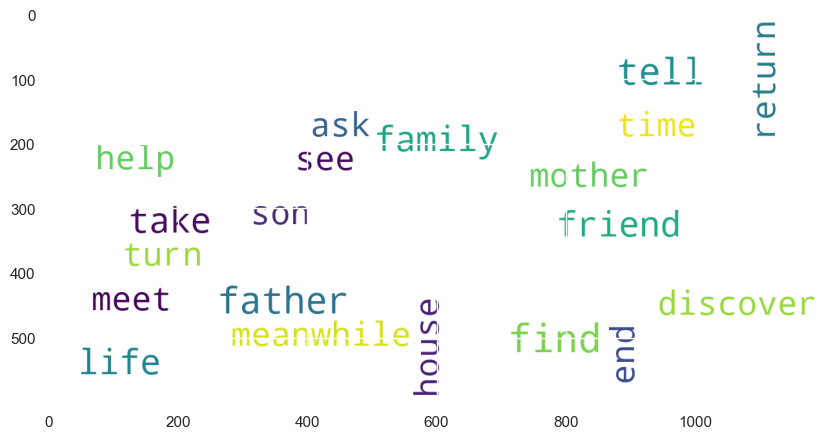

In [6]:
n_plot = df.shape[0]
plot_wordcloud(df["synopsis"][np.random.choice(df.shape[0], size=(n_plot,))])

(1887.999, 1933.0]


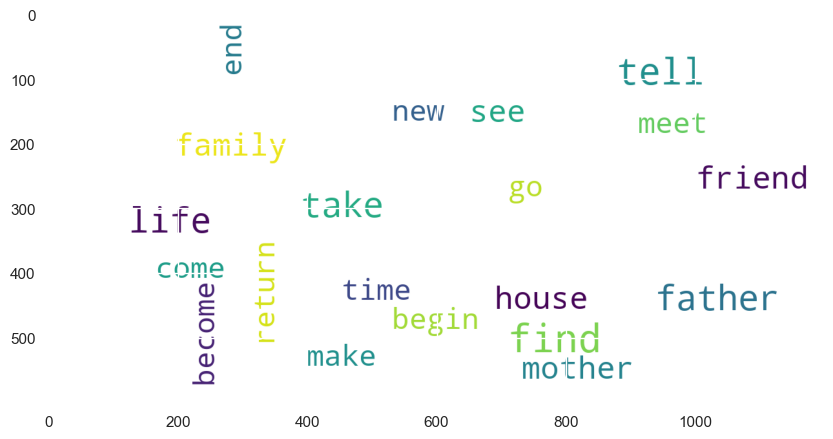

(1933.0, 1949.0]


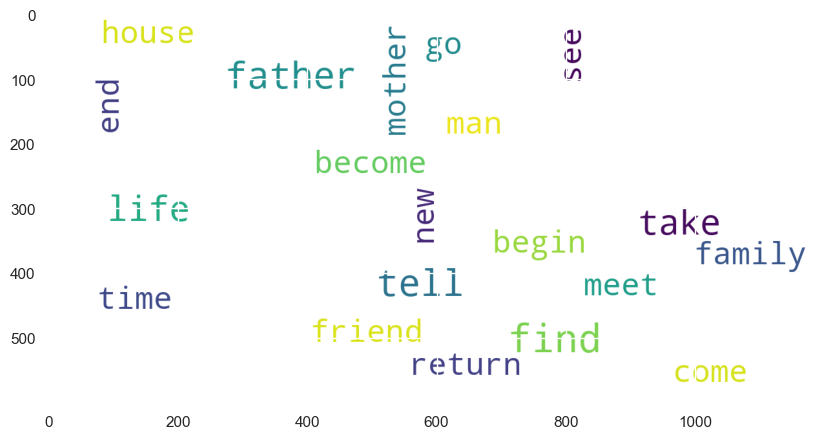

(1949.0, 1962.0]


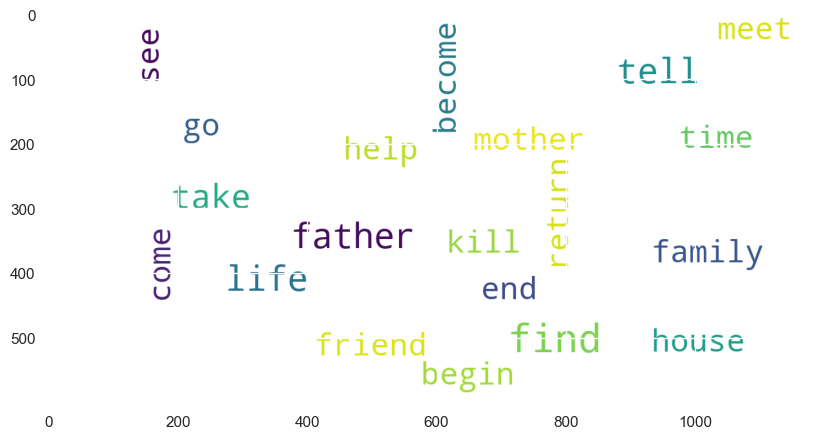

(1962.0, 1974.0]


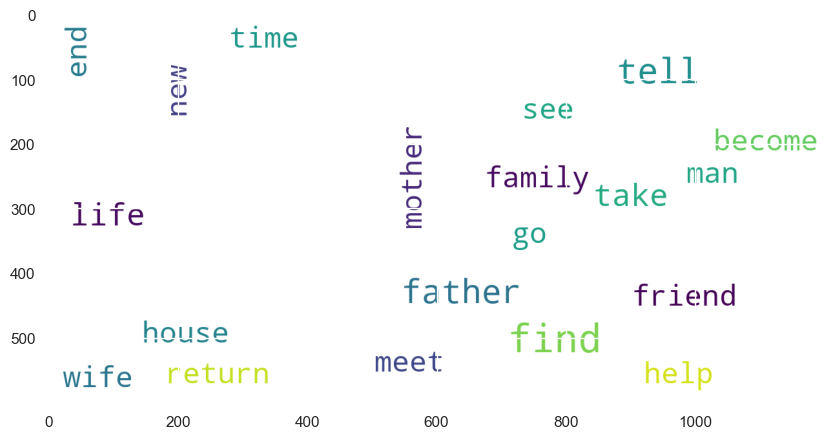

(1974.0, 1985.0]


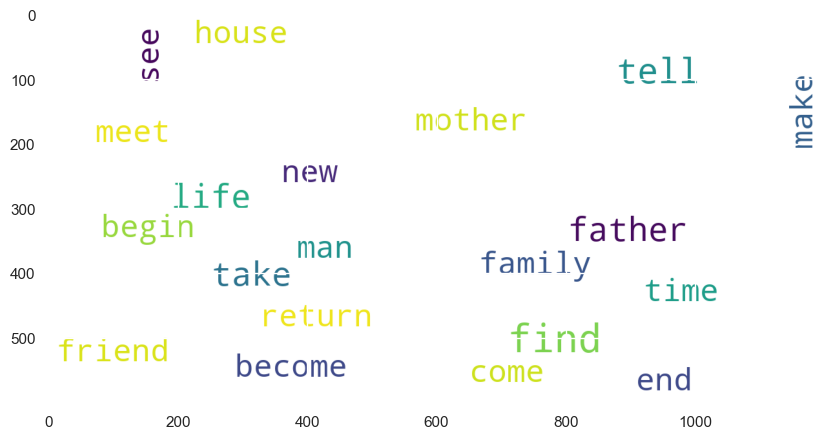

(1985.0, 1994.0]


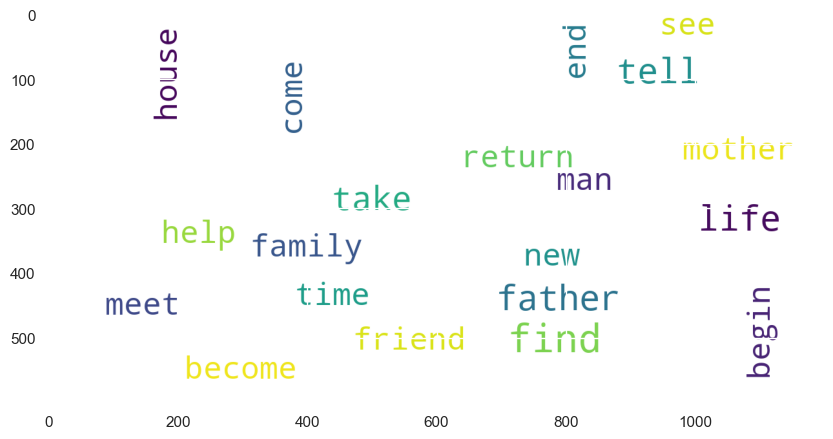

(1994.0, 2001.0]


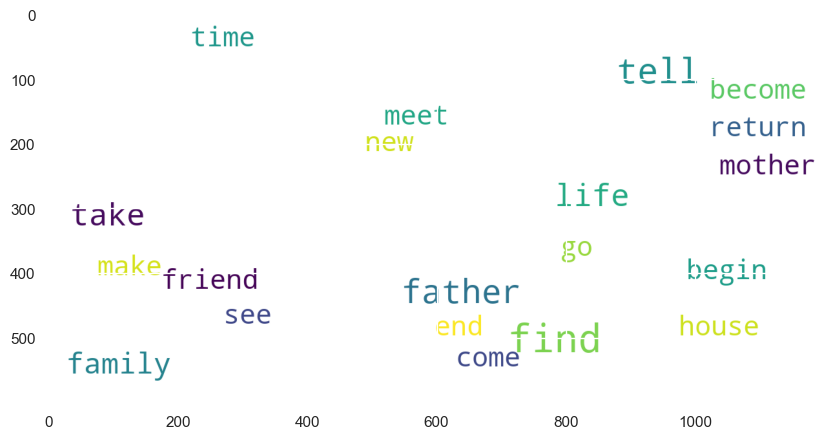

(2001.0, 2005.0]


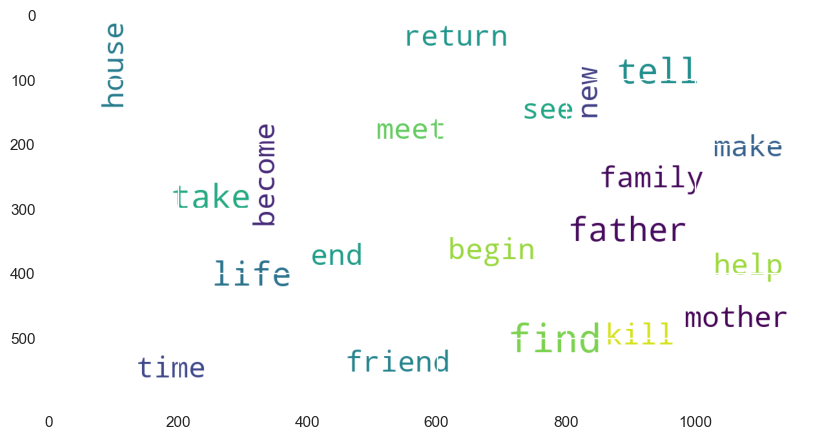

(2005.0, 2008.0]


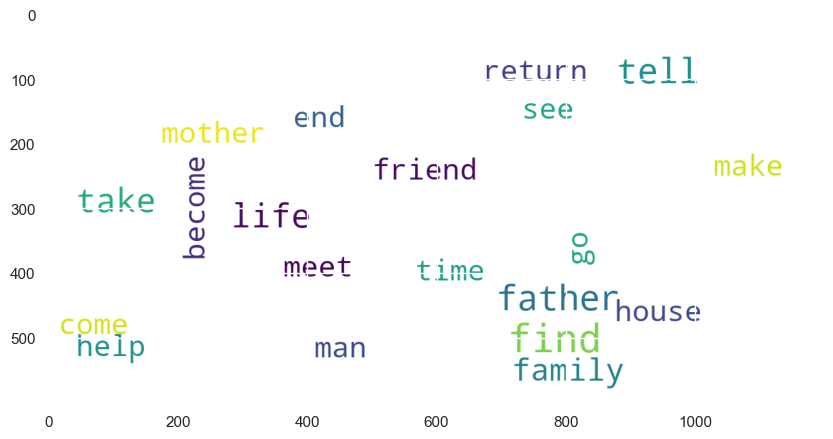

(2008.0, 2016.0]


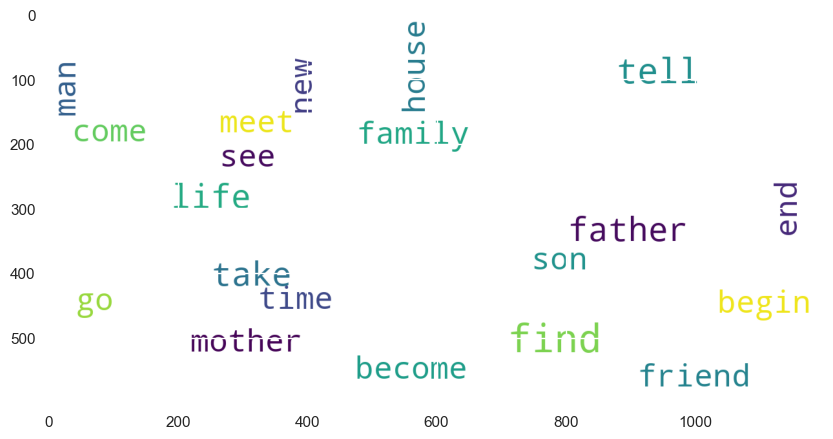

In [7]:
for period, indices in df.groupby("ReleasePeriod").groups.items():
    print(period)
    plot_wordcloud(df.loc[indices, "synopsis"])

In [8]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/